In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
# df = sns.load_dataset("penguins")
import statsmodels.formula.api as sm
import pandas as pd

### Comparing NPB, PB and JK

<Axes: ylabel='Density'>

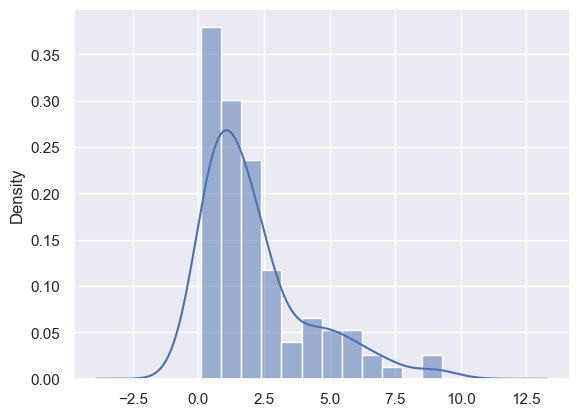

In [2]:
sample_exp = npr.exponential(2, 100)
sns.histplot(sample_exp, kde=True, stat="density", kde_kws=dict(cut=5))

<Axes: ylabel='Density'>

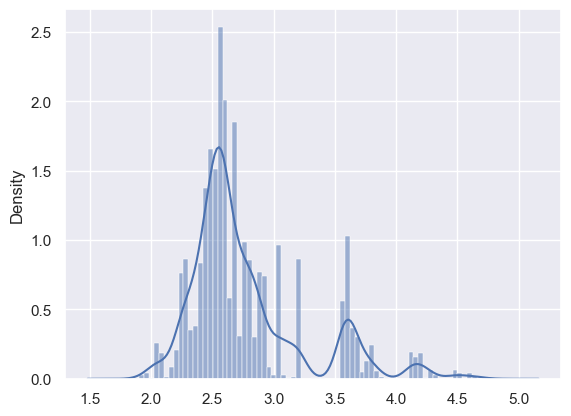

In [3]:
# Non-prametric Bootstrap

boot_samples = npr.choice(sample_exp, size=(10000,len(sample_exp)), replace=True)    
quant_npb = np.quantile(boot_samples, 0.75, axis=1)

sns.histplot(quant_npb, kde=True, stat="density", kde_kws=dict(cut=5))

In [4]:
np.quantile(quant_npb, (0.025, 0.975))

array([2.19130311, 4.12934629])

<Axes: ylabel='Density'>

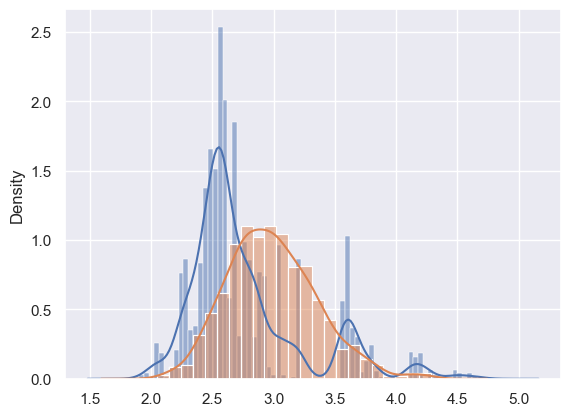

In [5]:
# Parametric Bootstrap

theta_hat = np.mean(sample_exp)
theta_hat

quant_pb = []
for i in range(1000):
    sub_sample = npr.exponential(theta_hat, len(sample_exp))
    quant_pb.append(np.quantile(sub_sample, 0.75))


sns.histplot(quant_npb, kde=True, stat="density", kde_kws=dict(cut=5))
sns.histplot(quant_pb, kde=True, stat="density", kde_kws=dict(cut=5))



In [6]:
np.quantile(quant_pb, (0.025, 0.975))

array([2.36308246, 3.77542424])

In [7]:
# Jacknife 
quant_jk = []

for i in range(len(sample_exp)):
    sub_sample = np.delete(sample_exp, i)
    quant_jk.append(np.quantile(sub_sample, 0.75))

<Axes: ylabel='Density'>

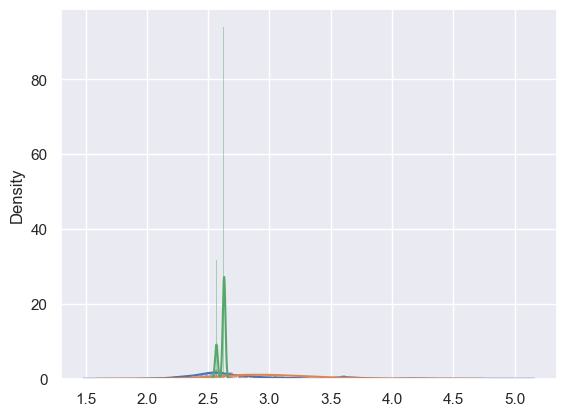

In [8]:
sns.histplot(quant_npb, kde=True, stat="density", kde_kws=dict(cut=5))
sns.histplot(quant_pb, kde=True, stat="density", kde_kws=dict(cut=5))
sns.histplot(quant_jk, kde=True, stat="density", kde_kws=dict(cut=5))

<Axes: ylabel='Density'>

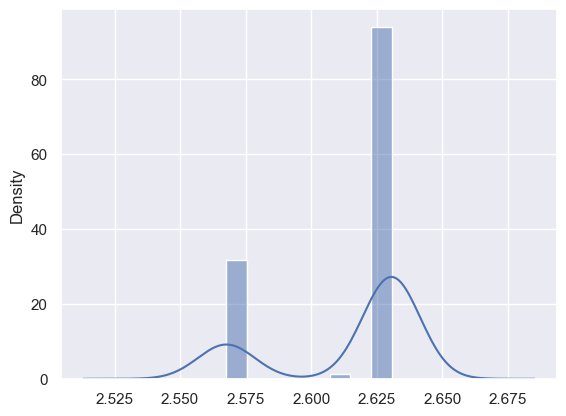

In [9]:
sns.histplot(quant_jk, kde=True, stat="density", kde_kws=dict(cut=5))

In [10]:
np.quantile(quant_jk, (0.025, 0.975))

array([2.56762511, 2.63060377])

As you can see, the distribution is strongly skew to the left. The quantiles of jack.reg are not particularly
informative because the sample is so small (just 35).

However, the jackknife does draw attention to one
particularly inﬂuential point (the extreme left-hand bar) which, when omitted from the dataframe, causes the
estimated slope to fall below 1.0. 


Now we can draw regression lines for the full data set (blue line) and for the model with the inﬂuential point
number 22 omitted (red line) to see just how inﬂuential (or not) this point really is for the location of the line:



## Bootstrap in Regressions

In [11]:
n_point = 15
x = np.linspace(3,30, n_point)
u = npr.normal(0,3.8*x, n_point)
b1=2
b2=3
y = b1+b2*x+u

In [12]:
df = pd.DataFrame({'x':x,'y':y})
ols = sm.ols(formula='y~x', data=df)
res = ols.fit()

In [13]:
ypred = res.predict(df['x'])

In [14]:
res.params

Intercept   -0.825222
x            3.700499
dtype: float64

In [15]:
res.summary()

/home/xenakas/.venv/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     6.530
Date:                Tue, 21 Nov 2023   Prob (F-statistic):             0.0239
Time:                        17:36:56   Log-Likelihood:                -77.877
No. Observations:                  15   AIC:                             159.8
Df Residuals:                      13   BIC:                             161.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8252     26.768     -0.031      0.976     -58.654      57.003
x              3.7005      1.448      2.555      0.024       0.572       6.829
==============================================================================
Omnibus:                        0.586   Durbin-Watson:                   2.554
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.338
Skew:                           0.339   Prob(JB):                        0.844
Kurtosis:                       2.714   Cond. No.                         41.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

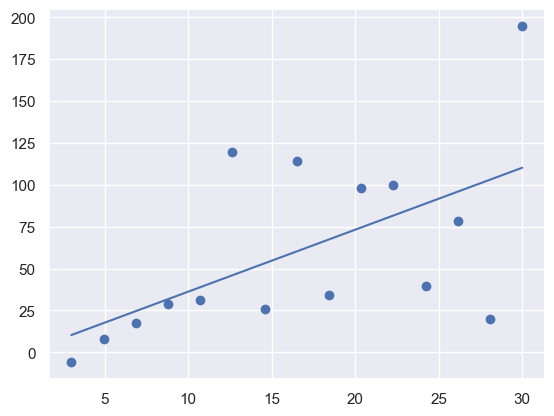

In [16]:
plt.scatter(x,y)
plt.plot(x,ypred)

### Pair Bootstrap

In [17]:
df = pd.DataFrame({'x':x,'y':y})
ols = sm.ols(formula='y~x', data=df)
res = ols.fit()
ypred = res.predict(df['x'])

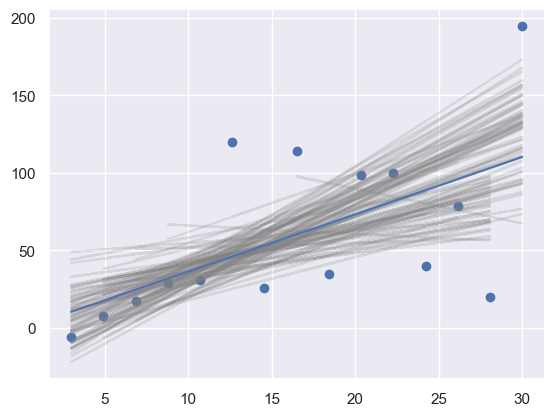

In [43]:
b1_pair = []
b2_pair = []

n_boot=1000

plt.figure()

for i in range(n_boot):
    sample_df = df.sample(n=n_point, replace=True) 
    ols_boot = sm.ols(formula='y~x', data=sample_df)
    res_boot = ols_boot.fit()
    
    b1_pair.append(res_boot.params.iloc[0])
    b2_pair.append(res_boot.params.iloc[1])

    if i<100:
        ypred_boot = res_boot.predict(sample_df['x'])
        plt.plot(sample_df['x'], ypred_boot, color='grey', alpha=0.2)


plt.scatter(x,y)
plt.plot(x,ypred)   

<Axes: ylabel='Density'>

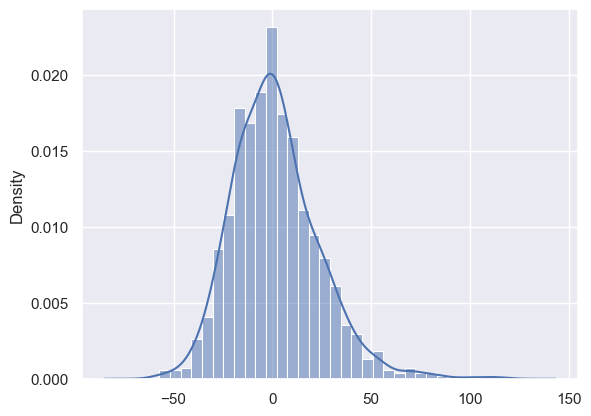

In [19]:
sns.histplot(b1_pair, kde=True, stat="density", kde_kws=dict(cut=5))

<Axes: ylabel='Density'>

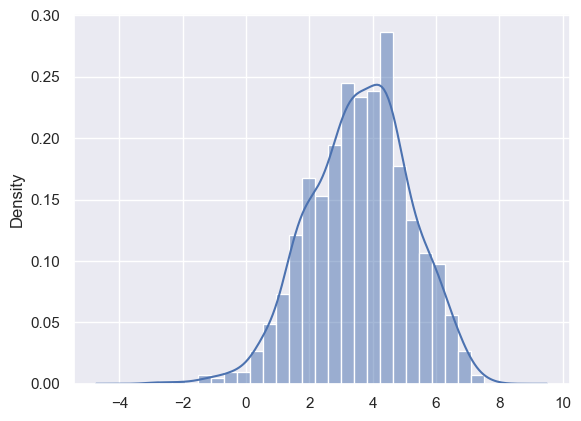

In [20]:
sns.histplot(b2_pair, kde=True, stat="density",kde_kws=dict(cut=5))

In [21]:
np.percentile(b1_pair,[2.5,97.5])

array([-34.55309061,  51.36748837])

In [22]:
np.percentile(b2_pair,[2.5,97.5])

array([0.52022462, 6.50594875])

In [23]:
np.mean(b1_pair), np.mean(b2_pair)

(1.5642318688189971, 3.607082064885932)

### Bootstrapping Residuals

In [24]:
df = pd.DataFrame({'x':x,'y':y})
ols = sm.ols(formula='y~x', data=df)
res = ols.fit()
ypred = res.predict(df['x'])
residuals = res.resid

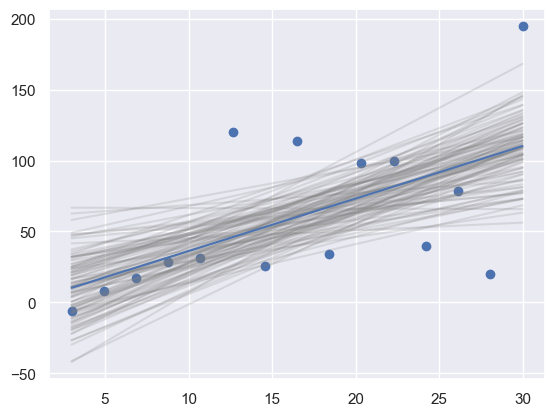

In [44]:
b1_res = []
b2_res = []

n_boot=1000

plt.figure()

for i in range(n_boot):
    
    boot_res = npr.choice(residuals, n_point, replace=True)
    y_boot = ypred + boot_res
    
    sample_df = pd.DataFrame({'x':x,'y':y_boot})
    ols_boot = sm.ols(formula='y~x', data=sample_df)
    res_boot = ols_boot.fit()
    
    b1_res.append(res_boot.params.iloc[0])
    b2_res.append(res_boot.params.iloc[1])

    if i<100:
        ypred_boot = res_boot.predict(sample_df['x'])
        plt.plot(sample_df['x'], ypred_boot, color='grey', alpha=0.2)

plt.scatter(x,y)
plt.plot(x,ypred)   

<Axes: ylabel='Density'>

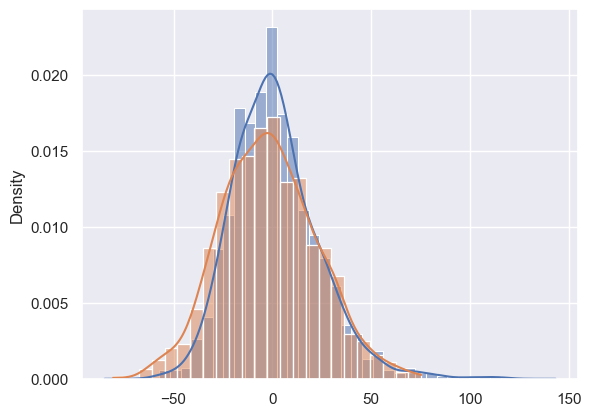

In [26]:
sns.histplot(b1_pair, kde=True, stat="density", kde_kws=dict(cut=5))
sns.histplot(b1_res, kde=True, stat="density")

<Axes: ylabel='Density'>

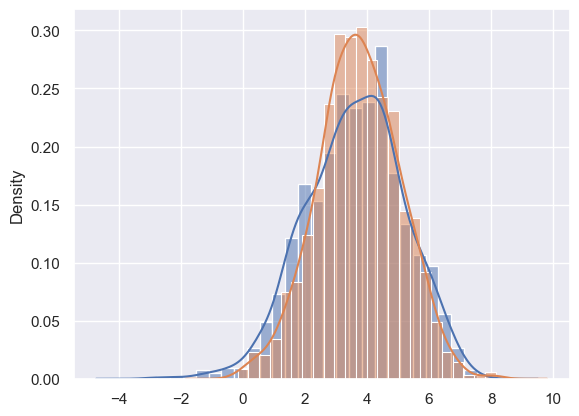

In [27]:
sns.histplot(b2_pair, kde=True, stat="density", kde_kws=dict(cut=5))
sns.histplot(b2_res, kde=True, stat="density", kde_kws=dict(cut=5))

In [28]:
np.percentile(b1_res,[2.5,97.5])

array([-48.23833906,  48.61206311])

In [29]:
np.percentile(b2_res,[2.5,97.5])

array([1.10070926, 6.27653095])

### Wild Bootstrap

In [30]:
df = pd.DataFrame({'x':x,'y':y})
ols = sm.ols(formula='y~x', data=df)
res = ols.fit()
ypred = res.predict(df['x'])
residuals = res.resid


In [31]:
X = pd.DataFrame({'0':np.repeat(1,n_point),'1':x})

In [32]:
h_weights = []

for i in range(n_point):
    h_weights.append(X.iloc[i,:] @ np.linalg.inv(X.T@X) @ X.T.iloc[:,i])


In [33]:
h_weights = np.array(h_weights)

In [34]:
t = (residuals-np.mean(residuals))/np.std(residuals)

In [35]:
res_w = residuals/np.sqrt(1-h_weights)

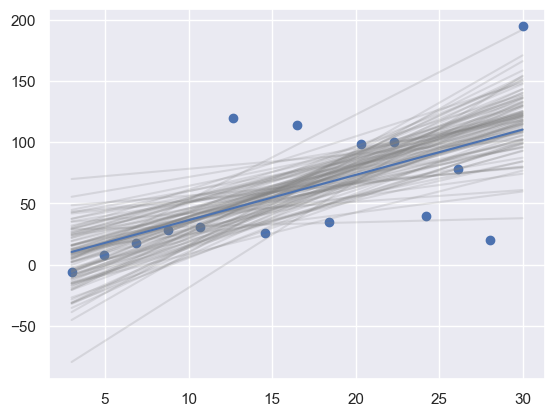

In [36]:
b1_res2 = []
b2_res2 = []

n_boot=1000

plt.figure()

for i in range(n_boot):
    
    boot_res = npr.choice(res_w, n_point, replace=True)
    t_boot = npr.choice(t, n_point, replace=True)
        
    y_boot = ypred + t_boot*boot_res
    
    sample_df = pd.DataFrame({'x':x,'y':y_boot})
    ols_boot = sm.ols(formula='y~x', data=sample_df)
    res_boot = ols_boot.fit()
    
    b1_res2.append(res_boot.params.iloc[0])
    b2_res2.append(res_boot.params.iloc[1])

    if i<100:
        ypred_boot = res_boot.predict(sample_df['x'])
        plt.plot(sample_df['x'], ypred_boot, color='grey', alpha=0.2)

plt.scatter(x,y)
plt.plot(x,ypred)   

<Axes: ylabel='Density'>

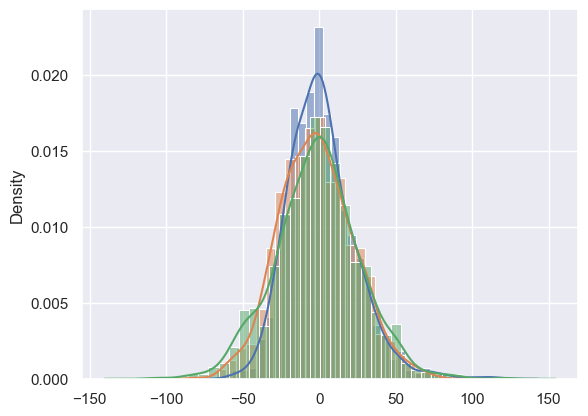

In [37]:
sns.histplot(b1_pair, kde=True, stat="density", kde_kws=dict(cut=5))
sns.histplot(b1_res, kde=True, stat="density", kde_kws=dict(cut=5))
sns.histplot(b1_res2, kde=True, stat="density", kde_kws=dict(cut=5))

<Axes: ylabel='Density'>

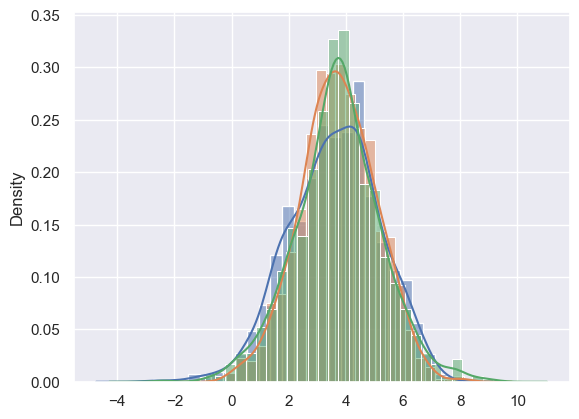

In [38]:
sns.histplot(b2_pair, kde=True, stat="density", kde_kws=dict(cut=5))
sns.histplot(b2_res, kde=True, stat="density", kde_kws=dict(cut=5))
sns.histplot(b2_res2, kde=True, stat="density", kde_kws=dict(cut=5))

In [39]:
np.percentile(b1_res2,[2.5,97.5])

array([-54.38978823,  52.00708545])

In [40]:
np.percentile(b2_res2,[2.5,97.5])

array([0.57306804, 6.73197906])

In [41]:
np.percentile(b2_res2,[2.5,97.5])

array([0.57306804, 6.73197906])